# Project Goal


This project aims to build a ML model that can predict the auction price for a piece of heavy machinery based upon past sales data.

In [ ]:
! python --version

Python 3.7.12


# Data


The data for this project was obtained from the Kaggle competition "Blue Book for Bulldozers", available [here](https://www.kaggle.com/c/bluebook-for-bulldozers/data)

The competition provided train, validation and test datasets. The test dataset, however, only provides the observations not the sale price for the observation. As such, we are unable to utilize the test dataset to evaluate our model. Instead, we will rely upon the validation dataset to evaluate our model's performance.

The combined train and validation dataset consists of a total of 412698 observations with 53 features (including the target variable). As discussed below, multiple features will be discarded as they are either duplicating information or serve as unique identifiers and as such do not provide usefule information for the model.

The split for test and validation observations has been made based upon the date of sale. All sales prior to January 1, 2012 are in the training set while those after are in the validation dataset.

# Prep Environment

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Install packages

In [ ]:
!pip install feature-engine

!pip uninstall xgboost -y
!pip install -U xgboost

!pip uninstall scikit-learn -y
!pip install -U scikit-learn

!pip install dython

     |████████████████████████████████| 205 kB 9.0 MB/s 
     |████████████████████████████████| 9.8 MB 45.7 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
Found existing installation: xgboost 0.90
Uninstalling xgboost-0.90:
  Successfully uninstalled xgboost-0.90
     |████████████████████████████████| 173.6 MB 6.1 kB/s 
Found existing installation: scikit-learn 1.0.2
Uninstalling scikit-learn-1.0.2:
  Successfully uninstalled scikit-learn-1.0.2
     |████████████████████████████████| 24.8 MB 1.4 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
     |████████████████████████████████| 11.2 MB 47.7 MB/s 
     |████████████████████████████████| 895 kB 43.0 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
  Attempting uninstall: matplotlib

In [ ]:
! pip install scikit-optimize

     |████████████████████████████████| 100 kB 4.5 MB/s 


## load modules

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import sklearn

from scipy.stats import chi2_contingency

In [ ]:
from feature_engine.datetime import DatetimeFeatures
from feature_engine.selection import DropConstantFeatures
from feature_engine.selection import SmartCorrelatedSelection
from dython import nominal
from feature_engine.encoding import OrdinalEncoder as oe, MeanEncoder, CountFrequencyEncoder, RareLabelEncoder, OneHotEncoder as ohe
from feature_engine.imputation import ArbitraryNumberImputer
from feature_engine.imputation import CategoricalImputer
from feature_engine.creation import CombineWithReferenceFeature
from feature_engine.outliers import ArbitraryOutlierCapper
import seaborn as sns
import math

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler,FunctionTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
import os
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from joblib import dump, load
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, explained_variance_score, r2_score, mean_squared_error
from skopt import BayesSearchCV
import xgboost as xgb
from skopt.space import Real, Categorical, Integer, Space
from sklearn.preprocessing import FunctionTransformer



## Create directories if neeeded

In [ ]:
basedir = '/content/drive/MyDrive/bulldozer_analysis'
try:
    os.makedirs(os.path.join(basedir, "data/02_interim"))
except FileExistsError:
    # directory already exists
    pass

try:
    os.makedirs(os.path.join(basedir, "data/03_processed"))
except FileExistsError:
    # directory already exists
    pass

try:
    os.makedirs(os.path.join(basedir, "data/03_processed/model1"))
except FileExistsError:
    # directory already exists
    pass

try:
    os.makedirs(os.path.join(basedir, "data/03_processed/model2"))
except FileExistsError:
    # directory already exists
    pass

try:
    os.makedirs(os.path.join(basedir, "data/03_processed/model3"))
except FileExistsError:
    # directory already exists
    pass


try:
    os.makedirs(os.path.join(basedir, "data/03_processed/model4"))
except FileExistsError:
    # directory already exists
    pass


try:
    os.makedirs(os.path.join(basedir, "data/03_processed/model5"))
except FileExistsError:
    # directory already exists
    pass

try:
    os.makedirs(os.path.join(basedir, "data/03_processed/model6"))
except FileExistsError:
    # directory already exists
    pass    

try:
    os.makedirs(os.path.join(basedir, "data/03_processed/model7"))
except FileExistsError:
    # directory already exists
    pass 


try:
    os.makedirs(os.path.join(basedir, "data/03_processed/model_ed"))
except FileExistsError:
    # directory already exists
    pass

try:
    os.makedirs(os.path.join(basedir, "models"))
except FileExistsError:
    # directory already exists
    pass

try:
    os.makedirs(os.path.join(basedir, "models/model1"))
except FileExistsError:
    # directory already exists
    pass

try:
    os.makedirs(os.path.join(basedir, "models/model2"))
except FileExistsError:
    # directory already exists
    pass

try:
    os.makedirs(os.path.join(basedir, "models/model3"))
except FileExistsError:
    # directory already exists
    pass

try:
    os.makedirs(os.path.join(basedir, "models/model4"))
except FileExistsError:
    # directory already exists
    pass

try:
    os.makedirs(os.path.join(basedir, "models/model5"))
except FileExistsError:
    # directory already exists
    pass

try:
    os.makedirs(os.path.join(basedir, "models/model6"))
except FileExistsError:
    # directory already exists
    pass

try:
    os.makedirs(os.path.join(basedir, "models/model7"))
except FileExistsError:
    # directory already exists
    pass

try:
    os.makedirs(os.path.join(basedir, "models/model_ed"))
except FileExistsError:
    # directory already exists
    pass




## define custom methods

define method to extract column names from a column transformer


In [ ]:
def get_column_names_from_ColumnTransformer(column_transformer):    
    col_name = []
    for transformer_in_columns in column_transformer.transformers_:#the last transformer is ColumnTransformer's 'remainder'
        raw_col_name = transformer_in_columns[2]
        if isinstance(transformer_in_columns[1],Pipeline): 
            transformer = transformer_in_columns[1].steps[-1][1]
        else:
            transformer = transformer_in_columns[1]
        try:
            names = transformer.get_feature_names()
        except AttributeError: # if no 'get_feature_names' function, use raw column name
            names = raw_col_name
        if isinstance(names,np.ndarray): # eg.
            col_name += names.tolist()
        elif isinstance(names,list):
            col_name += names    
        elif isinstance(names,str):
            col_name.append(names)
    return col_name

# Import Datasets

In [ ]:
datapath = os.path.join(basedir, "data/01_raw/TrainAndValid.csv") 
df = pd.read_csv(datapath, low_memory=False, parse_dates=['saledate'])
# df = pd.read_csv("../data/01_raw/TrainAndValid.csv", low_memory=False, parse_dates=['saledate'])
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,521D,521,D,NaN,NaN,NaN,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,950FII,950,F,II,NaN,Medium,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,23.5,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,226,226,NaN,NaN,NaN,NaN,Skid Steer Loader - 1351.0 to 1601.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,OROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,PC120-6E,PC120,NaN,-6E,NaN,Small,"Hydraulic Excavator, Track - 12.0 to 14.0 Metr...",Texas,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,S175,S175,NaN,NaN,NaN,NaN,Skid Steer Loader - 1601.0 to 1751.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,EROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Explore Dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 12  fi

## Missing Values
Count and percent of missing values per feature </br>
The dataset has a high number of missing values which will need to be imputed prior to building any models

In [ ]:
mv = pd.DataFrame(df.isna().sum(), columns=['count'])
mv['percent'] = percent_missing = mv['count'] / 412698

In [ ]:
mv

,count,percent
SalesID,0,0.000000
SalePrice,0,0.000000
MachineID,0,0.000000
ModelID,0,0.000000
datasource,0,0.000000
auctioneerID,20136,0.048791
YearMade,0,0.000000
MachineHoursCurrentMeter,265194,0.642586
UsageBand,339028,0.821492
saledate,0,0.000000


## Overall distribution of sales prices

<AxesSubplot:>

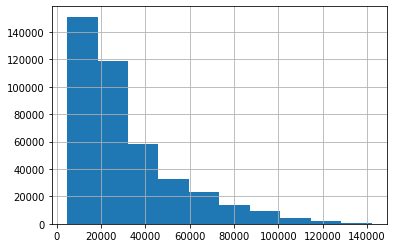

In [ ]:
df['SalePrice'].hist()

## Distribution of daily average of sales prices

<AxesSubplot:>

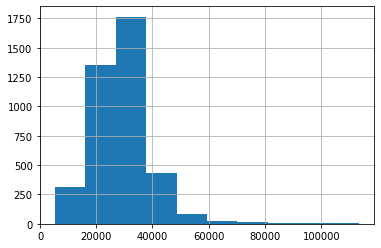

In [ ]:
df.groupby(by=['saledate'])['SalePrice'].mean().hist()

## Sort dataframe based on sale date

In [ ]:
df_prep = df.sort_values(by=['saledate'], ascending=True)

## Save interim copy of dataframe before making any changes

In [ ]:
df_prep.to_csv(os.path.join(basedir, "data/02_interim/df_eda.csv"), index=False)

## Remove Features
The following features will be removed from the dataset as they are likely redundant or have issues with missing values that are easiest solved by removing the field. If model performance is not acceptable these choices will be revisited.

* SalesID is a unique identifier so will not provide any useful information for modeling 
* ProductGroupDesc is simply the description for the ProductGroup. Both fields are likely not necessary
* MachineHoursCurrentMeter is missing over half the values. As there is no good method for imputation the field will be removed
* datasource is not related to the sale itself, but rather an indication of where the data for a particular observation was obtained
* MachineID is a unique ID for each machine so will be removed


The following fields are all derived from the ModelID field. As no new information is being introduced we will remove these fields
* fiModelDesc
* fiBaseModel
* fiSecondaryDesc
* fiModelSeries
* fiModelDescriptor
* fiProductClassDesc



In [ ]:
df_prep.drop(['MachineID','MachineHoursCurrentMeter','SalesID', 'ProductGroupDesc', 'fiModelDesc', 'datasource',
              'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries', 'fiModelDescriptor', 'fiProductClassDesc'], axis=1, inplace=True)

# Visualize Data

## Boxplots of categorical features against target variable

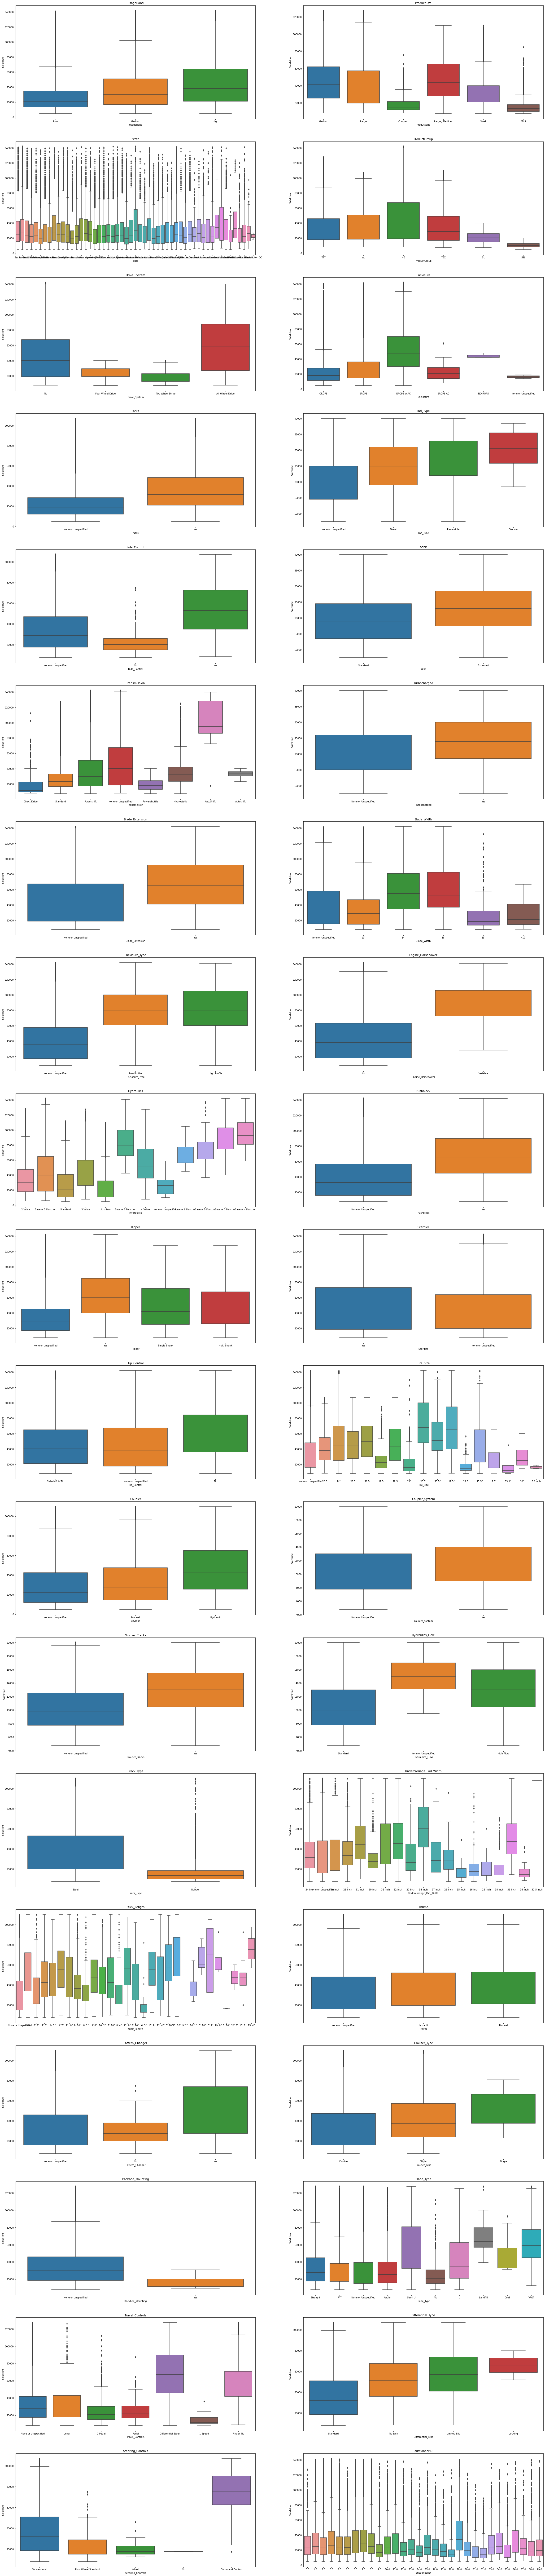

In [ ]:
cat_features = df_prep.select_dtypes(include=['object']).columns.to_list()
cat_features.append('auctioneerID')


fig = plt.figure(figsize=(40,400))
for i in range (1,len(cat_features)+1):
    ax = plt.subplot(math.ceil(len(cat_features)),2,i)
    sns.boxplot(data = df_prep, x=cat_features[i-1], y='SalePrice')
    plt.title(cat_features[i-1])
plt.show()

# Explore correlation of features and target 

## Perform ANOVA test on all categorical features against SalePrice
Resulting p-values indicate that there is a difference in the mean SalePrice between the multiple groups for each feature. This supports what the boxplots visually showed.

In [ ]:
results = []
for item in cat_features:
    lm = ols('SalePrice ~ C({})'.format(item), data=df_prep).fit()
    table = sm.stats.anova_lm(lm, typ=2)
    results.append(table.iloc[0,:])
    
pd.DataFrame(results, index=cat_features)

,sum_sq,df,F,PR(>F)
UsageBand,2.409763e+12,2.0,1933.651507,0.000000e+00
ProductSize,2.570088e+13,5.0,10275.455099,0.000000e+00
state,3.305594e+12,52.0,120.488020,0.000000e+00
ProductGroup,4.169972e+13,5.0,19194.191181,0.000000e+00
Drive_System,1.502021e+13,3.0,16684.243164,0.000000e+00
Enclosure,5.288964e+13,5.0,25958.561473,0.000000e+00
Forks,2.352600e+12,1.0,7523.298028,0.000000e+00
Pad_Type,3.238730e+11,3.0,1996.748035,0.000000e+00
Ride_Control,1.353992e+13,2.0,26733.464625,0.000000e+00
Stick,2.709214e+11,1.0,4951.196865,0.000000e+00


## View Correlation Heatmap for features and target

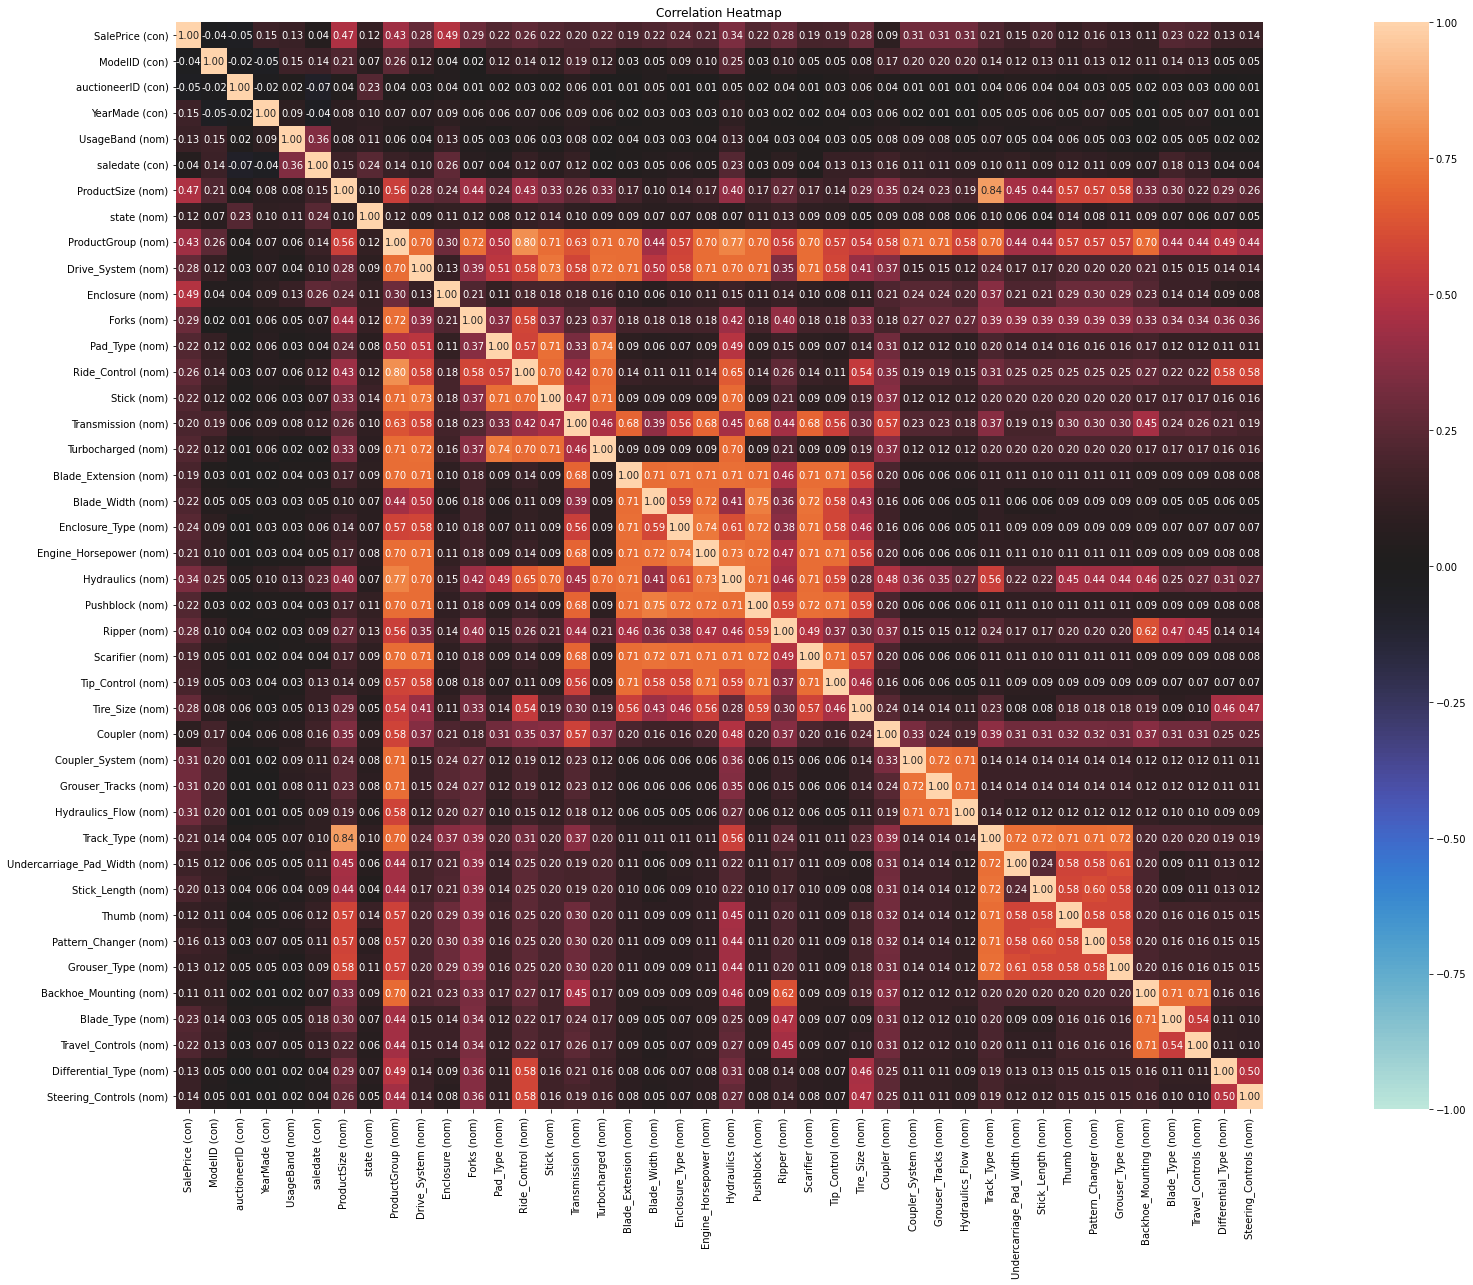

In [ ]:
nominal.associations(df_prep,figsize=(40,20), mark_columns=True, title="Correlation Heatmap")

plt.show()

## Check for any constant or quasi-constant features

no constant/quasi-constant features found in the dataset

In [ ]:
drop_constant = DropConstantFeatures(missing_values='ignore', tol=0.95)
drop_constant.fit(df_prep)
drop_constant.features_to_drop_

[]

## Fill Missing Values

auctioneerID will be filled using an additional float value of 999 <br />
all missing values for categorical features wil be replaced with 'Missing' <br />
Since the missing values are being filled with a constant and not imputed, we can replace all missing values prior to making the test-train split

In [ ]:
ani = ArbitraryNumberImputer(arbitrary_number=999., variables = ['auctioneerID'])
ci = CategoricalImputer(imputation_method='missing', fill_value='Missing')

df_cleaned = ani.fit_transform(df_prep)
df_cleaned = ci.fit_transform(df_cleaned)

Verify that no features contain mising values

In [ ]:
mv = pd.DataFrame(df_cleaned.isna().sum(), columns=['count'])
mv['percent'] = percent_missing = mv['count'] / 412698
mv

,count,percent
SalePrice,0,0.0
ModelID,0,0.0
auctioneerID,0,0.0
YearMade,0,0.0
UsageBand,0,0.0
saledate,0,0.0
ProductSize,0,0.0
state,0,0.0
ProductGroup,0,0.0
Drive_System,0,0.0


In [ ]:
df_cleaned.to_csv(os.path.join(basedir,"data/03_processed/df_cleaned.csv"), index=False)

# Create common transformers for preprocessing of data
additional transformers will be created on a per model basis

## Extract date components from saledate feature
create transformer to extract date components form 'saledate' field

In [ ]:
dtf = DatetimeFeatures(variables='saledate', 
                       features_to_extract=['month','year', 'day_of_week', 'weekend', 'month_start',
                                            'month_end', 'quarter_start', 'quarter_end'],
                      drop_original=True)
df_preprocessed = dtf.fit_transform(df_cleaned) 

In [ ]:
df_preprocessed.to_csv(os.path.join(basedir,"data/02_interim/df_preprocessed.csv"), index=False) 

## Encode state field using OrdinalEncoder
We will use OrdinalEncoder to represent each state by a numerical code. States seen in the test set but not training set will be given a value of -1

In [ ]:

state_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)


# Model Building

## Build Random Forest Model Using Feature Selection

### Determine Features for Removal

#### Check for correlated features
create a temp dataset with all categorical features ordinal encoded so that the correlation check can be run on all features </br>


In [ ]:
df_corr = df_preprocessed.copy()

In [ ]:
df_y = df_corr['SalePrice']
df_corr.drop('SalePrice', axis=1, inplace=True)
colnames = df_corr.columns.to_list()

In [ ]:
ord = OrdinalEncoder()
df_corr = ord.fit_transform(df_corr, df_y)

In [ ]:
df_corr = pd.DataFrame(df_corr, columns=colnames)

In [ ]:
np.random.seed(42)
scs = SmartCorrelatedSelection(threshold=0.9, selection_method='variance')

In [ ]:
scs.fit(df_corr)

SmartCorrelatedSelection(selection_method='variance', threshold=0.9)

In [ ]:
scs.correlated_feature_sets_

[{'Pad_Type', 'Turbocharged'},
 {'Blade_Extension',
  'Engine_Horsepower',
  'Pushblock',
  'Scarifier',
  'Tip_Control'},
 {'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow'},
 {'Pattern_Changer', 'Track_Type'},
 {'Differential_Type', 'Steering_Controls'}]

#### Review the features selected for removal from the dataset
##### we will save the features to a list and remove them from our cleaned dataset prior to making the test-train split
##### since the selected features change on each run, the features to be removed will be hard coded based on the last run

In [ ]:
print(scs.features_to_drop_)
remove = scs.features_to_drop_


['Turbocharged', 'Blade_Extension', 'Engine_Horsepower', 'Pushblock', 'Tip_Control', 'Coupler_System', 'Grouser_Tracks', 'Track_Type', 'Steering_Controls']


#### Remove selected fields from dataset

In [ ]:
df_model1_feature_selection_applied = df_preprocessed.drop(remove, axis=1)

In [ ]:
df_model1_feature_selection_applied.to_csv(os.path.join(basedir,"data/03_processed/model1/df_model1_feature_selection_applied.csv"), index=False)

### Split dataset into train and test sets
data for the year 2012 is used for the test set. all prior years are used for the train set

In [ ]:
testset = df_model1_feature_selection_applied[df_model1_feature_selection_applied['saledate_year'] == 2012]
trainset = df_model1_feature_selection_applied[df_model1_feature_selection_applied['saledate_year'] != 2012]
# testset.drop('saledate', axis=1, inplace=True)
# trainset.drop('saledate', axis=1, inplace=True)'

In [ ]:
X_test_model1 = testset.drop('SalePrice', axis=1)
y_test_model1 = testset['SalePrice']
X_train_model1 = trainset.drop('SalePrice', axis=1)
y_train_model1 = trainset['SalePrice']

In [ ]:
X_test_model1.to_csv(os.path.join(basedir,"data/03_processed/model1/Xtest_model1.csv"), index=False)
y_test_model1.to_csv(os.path.join(basedir,"data/03_processed/model1/ytest_model1.csv"),index=False)
X_train_model1.to_csv(os.path.join(basedir,"data/03_processed/model1/Xtrain_model1.csv"),index=False)
y_train_model1.to_csv(os.path.join(basedir,"data/03_processed/model1/ytrain_model1.csv"),index=False)

In [ ]:
X_test = pd.read_csv(os.path.join(basedir,"data/03_processed/model1/Xtest_model1.csv"))
y_test = pd.read_csv(os.path.join(basedir,"data/03_processed/model1/ytest_model1.csv"), squeeze=True)
X_train = pd.read_csv(os.path.join(basedir,"data/03_processed/model1/Xtrain_model1.csv"))
y_train = pd.read_csv(os.path.join(basedir,"data/03_processed/model1/ytrain_model1.csv"), squeeze=True)

### Build pipeline components: 


### Define One Hot Encoder and Ordinal Encoder
encoding of categorical features and state feature

In [ ]:
one_hot = OneHotEncoder(drop = 'if_binary', handle_unknown='ignore')
ord = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value = -1)

define features to transform with each encoder

In [ ]:
onehot_features = X_train_model1.select_dtypes(include='object').columns.to_list()
onehot_features.remove('state')
# onehot_features.remove('saledate')
state_features = ['state']
# date_features = ['saledate']

#### Build column transformer to apply encoders to correct columns
#### Need to include the following:
* OneHotEncoder
* State Encoder

In [ ]:
ct = ColumnTransformer([('onehot', one_hot, onehot_features), ('ordinal', state_encoder, state_features)], remainder='passthrough')

### Define Random Forest Regressor for use in hyperparmaeter tuning

In [ ]:
rf = RandomForestRegressor(random_state = 42, n_jobs=-1)
rf_grid = {'rf__criterion': ['squared_error'], 
           'rf__n_estimators': np.arange(10,100,10),
           'rf__max_depth': [None, 3, 5, 10, 15], 
           'rf__min_samples_split': np.arange(2,20,2), 
           'rf__min_samples_leaf': np.arange(1,20,2),
           'rf__max_features': [0.5, 1, "sqrt", "auto"],
           'rf__max_samples': [10000]}
rf_pipe = Pipeline(steps=[('ct',ct), ('rf', rf)])

In [ ]:
model_one_search = RandomizedSearchCV(rf_pipe, param_distributions = rf_grid, 
                           scoring = 'neg_mean_squared_log_error', 
                           cv=5, n_iter = 200, random_state=42)

In [ ]:
%%time
model_one_search.fit(X_train_model1, y_train_model1)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_encoders.py:174: UserWarning: Found unknown categories in columns [19] during transform. These unknown categories will be encoded as all zeros
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_encoders.py:174: UserWarning: Found unknown categories in columns [15] during transform. These unknown categories will be encoded as all zeros
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_encoders.py:174: UserWarning: Found unknown categories in columns [22] during transform. These unknown categories will be encoded as all zeros
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_encoders.py:174: UserWarning: Found unknown categories in columns [18] during transform. These unknown categories will be encoded as all zeros
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_encoders.py:174: UserWarning: Found unknown categories in 

CPU times: user 1h 25min 47s, sys: 1min 14s, total: 1h 27min 1s
Wall time: 7h 31min 45s


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('ct',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(drop='if_binary',
                                                                                             handle_unknown='ignore'),
                                                                               ['UsageBand',
                                                                                'ProductSize',
                                                                                'ProductGroup',
                                                                                'Drive_System',
                                                                                'Enclosure',
                                          

In [ ]:
dump(model_one_search,os.path.join(basedir, 'models/model1/model_one_search.joblib'))

['/content/drive/MyDrive/bulldozer/models/model1/model_one_search.joblib']

In [ ]:
model_one_search = load(os.path.join(basedir, 'models/model1/model_one_search.joblib'))

In [ ]:
model_one_search.best_params_

{'rf__criterion': 'squared_error',
 'rf__max_depth': None,
 'rf__max_features': 'auto',
 'rf__max_samples': 10000,
 'rf__min_samples_leaf': 3,
 'rf__min_samples_split': 10,
 'rf__n_estimators': 80}

### Build Random Forest Model Using Best Parameters

In [ ]:
rf_final = RandomForestRegressor(random_state = 42,
                                 max_depth = None, 
                                 max_features = 'auto',
                                 min_samples_leaf = 3,
                                 min_samples_split=10,
                                 n_estimators = 80,
                                 criterion = 'squared_error')
model1_best = Pipeline(steps=[('ct',ct), ('rf', rf_final)])

In [ ]:
model1_best.fit(X_train_model1, y_train_model1)
dump(model1_best, os.path.join(basedir, 'models/model1/model1_best.joblib'))

In [ ]:
model1_best = load(os.path.join(basedir, 'models/model1/model1_best.joblib'))

In [ ]:
model1_best_preds = model1_best.predict(X_test)

In [ ]:
mean_squared_log_error(y_test_model1, model1_best_preds, squared=False)

0.270617747851411

## Build Second Random Forest Model
A second model will be built. Rather than removing any features we will keep all features and use Ordinal Encoding for all features to keep the dimensionality as small as possible.

### Read back in the cleaned dataset and extract the datetime parts from the saledate feature

In [ ]:
df_model2 = pd.read_csv(os.path.join(basedir, 'data/02_interim/df_preprocessed.csv'))

In [ ]:

dump(df_model2, os.path.join(basedir, 'data/03_processed/model2/df_model2'))

['/content/drive/MyDrive/bulldozer/data/03_processed/model2/df_model2']

### Create new test/train split on full dataset (no feature selection having been used)

In [ ]:
testset2 = df_model2[df_model2['saledate_year'] == 2012]
trainset2 = df_model2[df_model2['saledate_year'] != 2012]


In [ ]:
X_test_model2 = testset2.drop('SalePrice', axis=1)
y_test_model2 = testset2['SalePrice']
X_train_model2 = trainset2.drop('SalePrice', axis=1)
y_train_model2 = trainset2['SalePrice']


In [ ]:
X_test_model2.to_csv(os.path.join(basedir,"data/03_processed/model2/Xtest_model2.csv"), index=False)
y_test_model2.to_csv(os.path.join(basedir,"data/03_processed/model2/ytest_model2.csv"),index=False)
X_train_model2.to_csv(os.path.join(basedir,"data/03_processed/model2/Xtrain_model2.csv"),index=False)
y_train_model2.to_csv(os.path.join(basedir,"data/03_processed/model2/ytrain_model2.csv"),index=False)

In [ ]:
test = pd.read_csv(os.path.join(basedir,"data/03_processed/model2/Xtest_model2.csv"))

In [ ]:
test.head()

,ModelID,auctioneerID,YearMade,UsageBand,ProductSize,state,ProductGroup,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saledate_month,saledate_year,saledate_day_of_week,saledate_weekend,saledate_month_start,saledate_month_end,saledate_quarter_start,saledate_quarter_end
0,26964,99.0,1996,Missing,Large,Michigan,TTT,Missing,OROPS,Missing,Missing,Missing,Missing,Standard,Missing,Missing,Missing,Missing,Missing,2 Valve,Missing,None or Unspecified,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,None or Unspecified,None or Unspecified,None or Unspecified,Missing,Missing,1,2012,6,1,1,0,1,0
1,23926,3.0,1000,Low,Missing,Florida,MG,No,OROPS,Missing,Missing,Missing,Missing,None or Unspecified,Missing,None or Unspecified,14',High Profile,No,Base + 1 Function,None or Unspecified,None or Unspecified,Yes,None or Unspecified,"17.5""",Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,1,2012,2,0,0,0,0,0
2,13260,99.0,2000,Low,Missing,Iowa,BL,Four Wheel Drive,OROPS,None or Unspecified,None or Unspecified,No,Extended,Standard,None or Unspecified,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,1,2012,2,0,0,0,0,0
3,1830,99.0,2004,Medium,Small,Mississippi,TEX,Missing,EROPS w AC,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Auxiliary,Missing,Missing,Missing,Missing,Missing,None or Unspecified,Missing,Missing,Missing,Steel,24 inch,None or Unspecified,None or Unspecified,None or Unspecified,Double,Missing,Missing,Missing,Missing,Missing,1,2012,2,0,0,0,0,0
4,11390,99.0,2006,Medium,Small,Mississippi,TEX,Missing,EROPS w AC,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Auxiliary,Missing,Missing,Missing,Missing,Missing,None or Unspecified,Missing,Missing,Missing,Steel,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,Missing,Missing,Missing,Missing,Missing,1,2012,2,0,0,0,0,0


### Define Ordinal Encoder and Column Transformer
All categorical features will be Ordinal Encoded. 

In [ ]:
ord = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value = -1)

In [ ]:
ordlist = X_train_model2.select_dtypes(include=['object']).columns.to_list()
ct_full = ColumnTransformer([("ord",ord, ordlist )], remainder='passthrough')

### Define model and pipeline for hyperparameter tuning

In [ ]:
rf_full_cv = RandomForestRegressor(random_state = 42,n_jobs=-1)
rf_grid = {'rf__criterion': ['squared_error'], 
           'rf__n_estimators': np.arange(10,100,10),
           'rf__max_depth': [None, 3, 5, 10, 15], 
           'rf__min_samples_split': np.arange(2,20,2), 
           'rf__min_samples_leaf': np.arange(1,20,2),
           'rf__max_features': [0.5, 1, "sqrt", "auto"],
           'rf__max_samples': [10000]}
rf_full_cv_pipeline = Pipeline(steps = [('ct', ct_full), ('rf', rf_full_cv)])

In [ ]:
model2_search = RandomizedSearchCV(rf_full_cv_pipeline, param_distributions = rf_grid, 
                           scoring = 'neg_mean_squared_log_error', 
                           cv=5, n_iter = 200, random_state=42)

In [ ]:
model2_search.fit(X_train_model2, y_train_model2)
dump(model2_search,os.path.join(basedir,'models/model2/model2_search.joblib'))

In [ ]:
model2_search = load(os.path.join(basedir, 'models/model2/model2_search.joblib'))

In [ ]:
model2_search.best_params_

{'rf__criterion': 'squared_error',
 'rf__max_depth': None,
 'rf__max_features': 'auto',
 'rf__max_samples': 10000,
 'rf__min_samples_leaf': 3,
 'rf__min_samples_split': 10,
 'rf__n_estimators': 80}

### Use best parameters from hyperparameter tuning to train a model using the full trainig set

In [ ]:
rf_full_final = RandomForestRegressor(random_state = 42,
                                 max_depth = None,
                                 max_features = 'auto', 
                                 min_samples_leaf = 3,
                                 min_samples_split=10,
                                 criterion = 'squared_error', 
                                 n_estimators = 80,
                                 n_jobs=-1)
model2_best = Pipeline(steps=[('ct',ct_full), ('rf', rf_full_final)])

In [ ]:
model2_best.fit(X_train_model2, y_train_model2)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ord',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['UsageBand', 'ProductSize',
                                                   'state', 'ProductGroup',
                                                   'Drive_System', 'Enclosure',
                                                   'Forks', 'Pad_Type',
                                                   'Ride_Control', 'Stick',
                                                   'Transmission',
                                                   'Turbocharged',
                                                   'Blade_Extension',
                                                   'Blade_Width',
                      

In [ ]:
dump(model2_best, os.path.join(basedir, 'models/model2/model2_best.joblib'))

['/content/drive/MyDrive/bulldozer/models/model2/model2_best.joblib']

In [ ]:
model2_best_preds = model2_best.predict(X_test_model2)

In [ ]:
#preds_full = target_scaler.inverse_transform(preds_full.reshape(-1,1))

In [ ]:
mean_squared_log_error(y_test_model2, model2_best_preds, squared=False)

0.26622070666682507

## Build XGBoost Model

### Load cleaned and prepared dataset then create test, validation and train sets

In [ ]:
df_model3 = pd.read_csv(os.path.join(basedir, 'data/03_processed/df_final.csv'))

In [ ]:
testset3 = df_model3[df_model3['saledate_year'] == 2012]
trainset3 = df_model3[df_model3['saledate_year'] != 2012]

In [ ]:
X_test_model3 = testset3.drop('SalePrice', axis=1)
y_test_model3 = testset3['SalePrice']
X_train_model3 = trainset3.drop('SalePrice', axis=1)
y_train_model3 = trainset3['SalePrice']

In [ ]:
X_train_model3, X_val_model3, y_train_model3, y_val_model3 = train_test_split(X_train_model3, y_train_model3, test_size=5000, random_state=42)

In [ ]:
X_train_model3.to_csv(os.path.join(basedir,"data/03_processed/model3/xtrain_model3.csv"), index=False)
X_val_model3.to_csv(os.path.join(basedir,"data/03_processed/model3/xval_model3.csv"), index=False)
X_test_model3.to_csv(os.path.join(basedir,"data/03_processed/model3/xtest_model3.csv"), index=False)
y_train_model3.to_csv(os.path.join(basedir,"data/03_processed/model3/ytrain_model3.csv"), index=False)
y_val_model3.to_csv(os.path.join(basedir,"data/03_processed/model3/yval_model3.csv"), index=False)
y_test_model3.to_csv(os.path.join(basedir,"data/03_processed/model3/ytest_model3.csv"), index=False)

### Define transformations for use in pipelines




#### Ordinal Encoder for categorical features

In [ ]:

ord = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value = -1)
ord_features = X_train_model3.select_dtypes(include='object').columns.to_list()


#### Log Tranformation for target variable
Initial XGB models showed the prediction of negative values for the price, so we will log transform the target variable prior to building a model to ensure all predictions are positive.

In [ ]:
log_transformer = FunctionTransformer(func=np.log, inverse_func=np.exp)

### Define XGBoost Model

In [ ]:
xgb_reg = xgb.XGBRegressor(tree_method='gpu_hist', n_jobs=-1, random_state=42, verbosity=0, objective='reg:squaredlogerror')

In [ ]:
xgb_params = {
        'xgb__n_estimators': np.arange(10,100,10),
        'xgb__max_depth': range(1, 11),
        'xgb__learning_rate': [1e-3, 1e-2, 1e-1, 0.5, 1.],
        'xgb__subsample': np.arange(0.05, 1.01, 0.05),
        'xgb__min_child_weight': range(1, 21)
        
    }

### Define Column Transformer and Pipeline

In [ ]:
ct = ColumnTransformer([('ordinal', ord, ord_features)], remainder='passthrough')

In [ ]:
# xgb_pipeline = Pipeline(steps = [('ct', ct), ('xgb',xgb_model)])
xgb_pipeline = Pipeline(steps = [('xgb',xgb_reg)])

### Apply column transformer to validation and training datasets after fitting to training dataset

In [ ]:
ct.fit(X_train_model3)
X_val_model3_ct = ct.transform(X_val_model3)
X_train_model3_ct = ct.transform(X_train_model3)

### Apply Target Transformer to validation and training datasets
for use in early stopping

In [ ]:
y_train_model3_log = log_transformer.transform(y_train_model3)
y_val_model3_log = log_transformer.transform(y_val_model3)

### Define RandomizedSearchCV function and perform search for optimal hyperparameters

In [ ]:
model3_search = RandomizedSearchCV(xgb_pipeline,
                                param_distributions = xgb_params,
                                n_iter=200,
                                scoring = 'neg_mean_squared_log_error',
                                return_train_score=True)

In [ ]:
model3_search.fit(X_train_model3_ct, y_train_model3_log, xgb__early_stopping_rounds=10, xgb__eval_metric='rmsle', xgb__eval_set=[(X_train_model3_ct, y_train_model3_log),(X_val_model3_ct, y_val_model3_log)])

Streaming output truncated to the last 5000 lines.
[60]	validation_0-rmsle:1.96032	validation_1-rmsle:1.95808
[61]	validation_0-rmsle:1.95965	validation_1-rmsle:1.95741
[62]	validation_0-rmsle:1.95899	validation_1-rmsle:1.95675
[63]	validation_0-rmsle:1.95833	validation_1-rmsle:1.95609
[64]	validation_0-rmsle:1.95767	validation_1-rmsle:1.95543
[65]	validation_0-rmsle:1.95701	validation_1-rmsle:1.95477
[66]	validation_0-rmsle:1.95635	validation_1-rmsle:1.95411
[67]	validation_0-rmsle:1.95569	validation_1-rmsle:1.95345
[68]	validation_0-rmsle:1.95503	validation_1-rmsle:1.95279
[69]	validation_0-rmsle:1.95436	validation_1-rmsle:1.95213
[70]	validation_0-rmsle:1.95370	validation_1-rmsle:1.95146
[71]	validation_0-rmsle:1.95304	validation_1-rmsle:1.95080
[72]	validation_0-rmsle:1.95238	validation_1-rmsle:1.95014
[73]	validation_0-rmsle:1.95172	validation_1-rmsle:1.94948
[74]	validation_0-rmsle:1.95106	validation_1-rmsle:1.94882
[75]	validation_0-rmsle:1.95040	validation_1-rmsle:1.94816
[76]	

RandomizedSearchCV(estimator=Pipeline(steps=[('xgb',
                                              XGBRegressor(base_score=None,
                                                           booster=None,
                                                           colsample_bylevel=None,
                                                           colsample_bynode=None,
                                                           colsample_bytree=None,
                                                           enable_categorical=False,
                                                           gamma=None,
                                                           gpu_id=None,
                                                           importance_type=None,
                                                           interaction_constraints=None,
                                                           learning_rate=None,
                                                           max_delta_step=

In [ ]:
dump(model3_search,os.path.join(basedir,'models/model3/model3_search.joblib'))

['/content/drive/MyDrive/bulldozer/models/model3/model3_search.joblib']

In [ ]:
model3_search = load(os.path.join(basedir, "models/model3/model3_search.joblib"))

In [ ]:
model3_search.best_params_

{'xgb__learning_rate': 0.5,
 'xgb__max_depth': 10,
 'xgb__min_child_weight': 1,
 'xgb__n_estimators': 50,
 'xgb__subsample': 0.6000000000000001}

### Build XGBoost Model using best parameters

Load train and test datasets

In [ ]:
X_test_model3 = pd.read_csv(os.path.join(basedir,"data/03_processed/model3/xtest_model3.csv"))
y_test_model3 = pd.read_csv(os.path.join(basedir,"data/03_processed/model3/ytest_model3.csv"), squeeze=True)
X_train_model3 = pd.read_csv(os.path.join(basedir,"data/03_processed/model3/xtrain_model3.csv"))
y_train_model3 = pd.read_csv(os.path.join(basedir,"data/03_processed/model3/ytrain_model3.csv"), squeeze=True)
X_val_model3 = pd.read_csv(os.path.join(basedir,"data/03_processed/model3/xval_model3.csv"))
y_val_model3 = pd.read_csv(os.path.join(basedir,"data/03_processed/model3/yval_model3.csv"), squeeze=True)

Define model, column transformer and pipeline

In [ ]:
xgb_best = xgb.XGBRegressor(learning_rate=0.5, 
                            max_depth=10, 
                            min_child_weight = 1, 
                            n_estimators = 50, 
                            subsample = 0.6, 
                            tree_method='gpu_hist', 
                            n_jobs=-1, 
                            random_state=42, 
                            verbosity=0, 
                            )

In [ ]:

ord = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value = -1)
ord_features = X_train_model3.select_dtypes(include='object').columns.to_list()


In [ ]:
ct = ColumnTransformer([('ordinal', ord, ord_features)], remainder='passthrough')

### Use column transformer to prepare training and validation data sets

In [ ]:
ct.fit(X_train_model3)
X_train_model3_ct = ct.transform(X_train_model3)
X_val_model3_ct = ct.transform(X_val_model3)
X_test_model3_ct = ct.transform(X_test_model3)

Save transformed datasets

In [ ]:
np.save(os.path.join(basedir, "data/03_processed/model3/xtrain_model3_ctfit.npy"), X_train_model3_ct)
np.save(os.path.join(basedir, "data/03_processed/model3/xval_model3_ctfit.npy"), X_val_model3_ct)
np.save(os.path.join(basedir, "data/03_processed/model3/xtest_model3_ctfit.npy"), X_test_model3_ct)

### Transform targer variables

In [ ]:
y_train_model3_log = log_transformer.transform(y_train_model3)
y_val_model3_log = log_transformer.transform(y_val_model3)

In [ ]:
model3_best = Pipeline([('xgb_best', xgb_best)])

In [ ]:
model3_best.fit(X_train_model3_ct, y_train_model3_log, xgb_best__early_stopping_rounds=10, xgb_best__eval_metric='rmse', xgb_best__eval_set=[(X_train_model3_ct, y_train_model3_log),(X_val_model3_ct, y_val_model3_log)])

[0]	validation_0-rmse:4.82560	validation_1-rmse:4.80696
[1]	validation_0-rmse:2.43050	validation_1-rmse:2.41678
[2]	validation_0-rmse:1.24432	validation_1-rmse:1.23300
[3]	validation_0-rmse:0.67032	validation_1-rmse:0.65959
[4]	validation_0-rmse:0.41273	validation_1-rmse:0.40511
[5]	validation_0-rmse:0.31262	validation_1-rmse:0.30946
[6]	validation_0-rmse:0.27732	validation_1-rmse:0.27743
[7]	validation_0-rmse:0.26223	validation_1-rmse:0.26452
[8]	validation_0-rmse:0.25476	validation_1-rmse:0.25908
[9]	validation_0-rmse:0.25107	validation_1-rmse:0.25644
[10]	validation_0-rmse:0.24824	validation_1-rmse:0.25472
[11]	validation_0-rmse:0.24609	validation_1-rmse:0.25237
[12]	validation_0-rmse:0.24388	validation_1-rmse:0.25069
[13]	validation_0-rmse:0.24197	validation_1-rmse:0.24929
[14]	validation_0-rmse:0.24075	validation_1-rmse:0.24800
[15]	validation_0-rmse:0.23908	validation_1-rmse:0.24664
[16]	validation_0-rmse:0.23729	validation_1-rmse:0.24521
[17]	validation_0-rmse:0.23599	validation

Pipeline(steps=[('xgb_best',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, enable_categorical=False,
                              gamma=0, gpu_id=0, importance_type=None,
                              interaction_constraints='', learning_rate=0.5,
                              max_delta_step=0, max_depth=10,
                              min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_estimators=50,
                              n_jobs=-1, num_parallel_tree=1, predictor='auto',
                              random_state=42, reg_alpha=0, reg_lambda=1,
                              scale_pos_weight=1, subsample=0.6,
                              tree_method='gpu_hist', validate_parameters=1,
                              verbosity=0))])

In [ ]:
dump(model3_best, os.path.join(basedir, 'models/model3/model3_best.joblib'))

['/content/drive/MyDrive/bulldozer/models/model3/model3_best.joblib']

In [ ]:
model3_best = load(os.path.join(basedir, "models/model3/model3_best.joblib"))

In [ ]:
model3_preds_log = model3_best.predict(X_test_model3_ct)

In [ ]:
model3_preds = log_transformer.inverse_transform(model3_preds_log)

In [ ]:
mean_squared_log_error(y_test_model3, model3_preds, squared=False)

0.2846294046948626

## Model 5: Updated Random Forest Model

For this model we will: 
- calculate an age of the machinery from the sale date and year of manufacture
- encode state field after grouping low occurance states in a new category
- encode ModelID based upon frequency of occurence (percentage)

In [ ]:
df_cleaned = pd.read_csv(os.path.join(basedir,"data/03_processed/df_cleaned.csv"))

### Split into train and test datasets
All data for the year 2012 and after will be for test

In [ ]:
X_train = df_cleaned[df_cleaned['saledate'] < '2012-01-01']
X_test = df_cleaned[df_cleaned['saledate'] >= '2012-01-01']

In [ ]:
X_train_model5 = X_train.drop('SalePrice', axis=1)
y_train_model5 = X_train['SalePrice']
X_test_model5 = X_test.drop('SalePrice', axis=1)
y_test_model5 = X_test['SalePrice']

In [ ]:
X_train_model5.to_csv(os.path.join(basedir,"data/03_processed/model5/xtrain_model5.csv"), index=False)
y_train_model5.to_csv(os.path.join(basedir,"data/03_processed/model5/ytrain_model5.csv"), index=False)
X_test_model5.to_csv(os.path.join(basedir,"data/03_processed/model5/xtest_model5.csv"), index=False)
y_test_model5.to_csv(os.path.join(basedir,"data/03_processed/model5/ytest_model5.csv"), index=False)

### Create tranformers and ColumnTransformer for use in pipeline
- extract date components from sale date feature
- create new category for low occuring states
- encode ModelID based upon percentage of occurences
- create age field based upon manufacture year and sale date
- ordinal encode all categorical fields

#### Define transformer to extract date parts from sale date
sale date field will be removed

In [ ]:
dtf = DatetimeFeatures(variables='saledate', 
                       features_to_extract=['month','year', 'day_of_week', 'weekend', 'month_start',
                                            'month_end', 'quarter_start', 'quarter_end'],
                      drop_original=True)
dtf_features = ['saledate']

#### Define transformer to cap outliers for YearMade at 1900 for min year
Dataset used 1000 for an unknown value. We'll upate that to 1900 so that our MinMax scaler has a better range


In [ ]:
aoc = ArbitraryOutlierCapper(min_capping_dict ={"YearMade": 1900}, missing_values='ignore')

#### Define transformer to create a new state value for low occurence states

In [ ]:
rle = RareLabelEncoder(max_n_categories=10, variables=['state'])

In [ ]:
rle.fit(X_train)
new = rle.transform(X_train)

#### Define transformer to encode ModelID

In [ ]:
cfe = CountFrequencyEncoder(variables=['ModelID'], encoding_method='frequency', ignore_format=True)
cfe_features = ['ModelID']

#### Define transformer to calculate machine age

In [ ]:
calc_age = CombineWithReferenceFeature(variables_to_combine=['saledate_year'], 
                                       reference_variables=['YearMade'], 
                                       operations=['sub'], 
                                       new_variables_names=['age'], 
                                       drop_original=False)
calc_age_features = ['saledate_year', 'YearMade']


#### Define transformer to convert any NaN for ModelID to zero

In [ ]:
impute = ArbitraryNumberImputer(arbitrary_number=0.0,variables=['ModelID'] )

#### Define transformer to scale age between 0 and 1

In [ ]:
minmax = MinMaxScaler()
minmax_features = ['age']

#### Define transformer to ordinal encode all categorical features

In [ ]:
ordenc_features = ['auctioneerID', 'UsageBand', 'ProductSize', 'state', 'ProductGroup',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls']
ordenc = oe(ignore_format=True, variables=ordenc_features)

#### Define column transformer to apply scaler tranformer for age as part of pipeline

In [ ]:
ct = ColumnTransformer([('minmax', minmax, minmax_features)], remainder = 'passthrough')


#### Define transformer pipeline, excluding actual model

In [ ]:
model5_pipeline = Pipeline([('aoc', aoc),
                         ('dtf', dtf), 
                         ('calc_age', calc_age), 
                         ('cfe', cfe),
                         ('rle', rle),
                         ('impute', impute),
                         ('ordenc', ordenc),
                         ('ct', ct),
                         ('passthrough', 'passthrough')])


column names after pipeline

In [ ]:
colnames = ['age','ModelID', 'auctioneerID', 'UsageBand', 'ProductSize', 'state',
       'ProductGroup', 'Drive_System', 'Enclosure', 'Forks', 'Pad_Type',
       'Ride_Control', 'Stick', 'Transmission', 'Turbocharged',
       'Blade_Extension', 'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower',
       'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control',
       'Tire_Size', 'Coupler', 'Coupler_System', 'Grouser_Tracks',
       'Hydraulics_Flow', 'Track_Type', 'Undercarriage_Pad_Width',
       'Stick_Length', 'Thumb', 'Pattern_Changer', 'Grouser_Type',
       'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
       'Differential_Type', 'Steering_Controls', 'saledate_month',
       'saledate_day_of_week', 'saledate_weekend', 'saledate_month_start',
       'saledate_month_end', 'saledate_quarter_start', 'saledate_quarter_end']

In [ ]:
X_train_model5_transformed = model5_pipeline.fit_transform(X_train_model5, y_train_model5)

In [ ]:
X_test_model5_transformed = model5_pipeline.transform(X_test_model5)

/usr/local/lib/python3.7/dist-packages/feature_engine/encoding/base_encoder.py:194: UserWarning: During the encoding, NaN values were introduced in the feature(s) ModelID.
  "During the encoding, NaN values were introduced in the feature(s) "


In [ ]:
np.save(os.path.join(basedir,"data/03_processed/model5/xtrain_model5_transformed.npy"),X_train_model5_transformed)

np.save(os.path.join(basedir,"data/03_processed/model5/xtest_model5_transformed.npy"),X_test_model5_transformed)


### Use RandomizedSearchCV to find optiomal hyperparameters for model

##### Define model and search parameters

In [ ]:
model5_cv = RandomForestRegressor(random_state = 42,n_jobs=-1)
rf_grid_old = {'rf__criterion': ['squared_error'], 
           'rf__n_estimators': np.arange(10,100,10),
           'rf__max_depth': [None, 3, 5, 10, 15], 
           'rf__min_samples_split': np.arange(2,20,2), 
           'rf__min_samples_leaf': np.arange(1,20,2),
           'rf__max_features': [0.5, 1, "sqrt", "auto"],
           'rf__max_samples': [10000]}


rf_grid = {'criterion': ['squared_error'], 
           'n_estimators': np.arange(10,100,10),
           'max_depth': [None, 3, 5, 10, 15], 
           'min_samples_split': np.arange(2,20,2), 
           'min_samples_leaf': np.arange(1,20,2),
           'max_features': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8 ,0.9, 1, "sqrt", "auto"],
           'max_samples': [10000]}

In [ ]:
model5_pipe = Pipeline([('aoc', aoc),
                         ('dtf', dtf), 
                         ('calc_age', calc_age), 
                         ('cfe', cfe),
                         ('rle', rle),
                         ('impute', impute),
                         ('ordenc', ordenc),
                         ('ct', ct),
                         ('rf', model5_cv)])



In [ ]:
model5_search = RandomizedSearchCV(model5_cv, param_distributions = rf_grid, 
                           scoring = 'neg_mean_squared_log_error', 
                           cv=5, n_iter = 400, random_state=42)

In [ ]:
model5_search.fit(X_train_model5_transformed, y_train_model5)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=400,
                   param_distributions={'criterion': ['squared_error'],
                                        'max_depth': [None, 3, 5, 10, 15],
                                        'max_features': [0.1, 0.2, 0.3, 0.4,
                                                         0.5, 0.6, 0.7, 0.8,
                                                         0.9, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   random_state=42, scoring

In [ ]:
dump(model5_search, os.path.join(basedir, "models/model5/model5_search.joblib"))

['/content/drive/MyDrive/bulldozer/models/model5/model5_search.joblib']

In [ ]:
model5_search.best_params_

{'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 0.8,
 'max_samples': 10000,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 90}

In [ ]:
model5_search.best_score_

-0.1007873128349142

### Build Random Forest Model using best parameters

In [ ]:
model5_best = RandomForestRegressor(random_state = 42,
                                    n_jobs=-1,
                                    criterion='squared_error',
                                    max_depth=None,
                                    max_features=0.8,
                                    max_samples=10000,
                                    min_samples_leaf = 3,
                                    min_samples_split=2,
                                    n_estimators=90)

In [ ]:
model5_best.fit(X_train_model5_transformed, y_train_model5)

RandomForestRegressor(max_features=0.8, max_samples=10000, min_samples_leaf=3,
                      n_estimators=90, n_jobs=-1, random_state=42)

In [ ]:
dump(model5_best, os.path.join(basedir,'models/model5/model5_best.joblib'))

['/content/drive/MyDrive/bulldozer/models/model5/model5_best.joblib']

## Model 6: Updated Random Forest Model Using One-Hot Encoder

For this model we will: 
- calculate an age of the machinery from the sale date and year of manufacture
- encode state field after grouping low occurance states in a new category
- encode ModelID based upon frequency of occurence (percentage)

In [ ]:
df_cleaned = pd.read_csv(os.path.join(basedir,"data/03_processed/df_cleaned.csv"))

### Split into train and test datasets
All data for the year 2012 and after will be for test

In [ ]:
X_train = df_cleaned[df_cleaned['saledate'] < '2012-01-01']
X_test = df_cleaned[df_cleaned['saledate'] >= '2012-01-01']

In [ ]:
X_train_model6 = X_train.drop('SalePrice', axis=1)
y_train_model6 = X_train['SalePrice']
X_test_model6 = X_test.drop('SalePrice', axis=1)
y_test_model6 = X_test['SalePrice']

In [ ]:
X_train_model6.to_csv(os.path.join(basedir,"data/03_processed/model6/xtrain_model6.csv"), index=False)
y_train_model6.to_csv(os.path.join(basedir,"data/03_processed/model6/ytrain_model6.csv"), index=False)
X_test_model6.to_csv(os.path.join(basedir,"data/03_processed/model6/xtest_model6.csv"), index=False)
y_test_model6.to_csv(os.path.join(basedir,"data/03_processed/model6/ytest_model6.csv"), index=False)

### Create tranformers and ColumnTransformer for use in pipeline
- extract date components from sale date feature
- create new category for low occuring states
- encode ModelID based upon percentage of occurences
- create age field based upon manufacture year and sale date
- ordinal encode all categorical fields

#### Define transformer to extract date parts from sale date
sale date field will be removed

In [ ]:
dtf = DatetimeFeatures(variables='saledate', 
                       features_to_extract=['month','year', 'day_of_week', 'weekend', 'month_start',
                                            'month_end', 'quarter_start', 'quarter_end'],
                      drop_original=True)
dtf_features = ['saledate']

#### Define transformer to cap outliers for YearMade at 1900 for min year
Dataset used 1000 for an unknown value. We'll upate that to 1900 so that our MinMax scaler has a better range


In [ ]:
aoc = ArbitraryOutlierCapper(min_capping_dict ={"YearMade": 1900}, missing_values='ignore')

#### Define transformer to create a new state value for low occurence states

In [ ]:
rle = RareLabelEncoder(max_n_categories=10, variables=['state'])

In [ ]:
rle.fit(X_train)
new = rle.transform(X_train)

#### Define transformer to encode ModelID

In [ ]:
cfe = CountFrequencyEncoder(variables=['ModelID'], encoding_method='frequency', ignore_format=True)
cfe_features = ['ModelID']

#### Define transformer to calculate machine age

In [ ]:
calc_age = CombineWithReferenceFeature(variables_to_combine=['saledate_year'], 
                                       reference_variables=['YearMade'], 
                                       operations=['sub'], 
                                       new_variables_names=['age'], 
                                       drop_original=False)
calc_age_features = ['saledate_year', 'YearMade']
#calc_age_features = [42, 3]

#### Define transformer to convert any NaN for ModelID to zero

In [ ]:
impute = ArbitraryNumberImputer(arbitrary_number=0.0,variables=['ModelID'] )

#### Define transformer to scale age between 0 and 1

In [ ]:
minmax = MinMaxScaler()
minmax_features = ['age']

#### Define transformer to one-hot encode all categorical features

In [ ]:
one_hot_features = ['auctioneerID', 'UsageBand', 'ProductSize', 'state', 'ProductGroup',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls']
one_hot = ohe(ignore_format=True, variables=one_hot_features)

#### Define column transformer to apply scaler tranformer for age as part of pipeline

In [ ]:
ct = ColumnTransformer([('minmax', minmax, minmax_features)], remainder = 'passthrough')


#### Define transformer pipeline, excluding actual model

In [ ]:
model6_pipeline = Pipeline([('aoc', aoc),
                         ('dtf', dtf), 
                         ('calc_age', calc_age), 
                         ('cfe', cfe),
                         ('rle', rle),
                         ('impute', impute),
                         ('one_hot', one_hot),
                         ('ct', ct),
                         ('passthrough', 'passthrough')])


In [ ]:
X_train_model6_transformed = model6_pipeline.fit_transform(X_train_model6, y_train_model6)

/usr/local/lib/python3.7/dist-packages/feature_engine/encoding/one_hot.py:237: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  X[feature] == category, 1, 0


In [ ]:
X_test_model6_transformed = model6_pipeline.transform(X_test_model6)

/usr/local/lib/python3.7/dist-packages/feature_engine/encoding/base_encoder.py:194: UserWarning: During the encoding, NaN values were introduced in the feature(s) ModelID.
  "During the encoding, NaN values were introduced in the feature(s) "
/usr/local/lib/python3.7/dist-packages/feature_engine/encoding/one_hot.py:237: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  X[feature] == category, 1, 0


In [ ]:
np.save(os.path.join(basedir,"data/03_processed/model6/xtrain_model6_transformed.npy"),X_train_model6_transformed)

np.save(os.path.join(basedir,"data/03_processed/model6/xtest_model6_transformed.npy"),X_test_model6_transformed)


### Use RandomizedSearchCV to find optiomal hyperparameters for model

##### Define model and search parameters

In [ ]:
model6_cv = RandomForestRegressor(random_state = 42,n_jobs=-1)
rf_grid_old = {'rf__criterion': ['squared_error'], 
           'rf__n_estimators': np.arange(10,100,10),
           'rf__max_depth': [None, 3, 5, 10, 15], 
           'rf__min_samples_split': np.arange(2,20,2), 
           'rf__min_samples_leaf': np.arange(1,20,2),
           'rf__max_features': [0.5, 1, "sqrt", "auto"],
           'rf__max_samples': [10000]}


rf_grid = {'criterion': ['squared_error'], 
           'n_estimators': np.arange(10,100,10),
           'max_depth': [None, 3, 5, 10, 15], 
           'min_samples_split': np.arange(2,20,2), 
           'min_samples_leaf': np.arange(1,20,2),
           'max_features': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8 ,0.9, 1, "sqrt", "auto"],
           'max_samples': [10000]}

In [ ]:
model6_search = RandomizedSearchCV(model6_cv, param_distributions = rf_grid, 
                           scoring = 'neg_mean_squared_log_error', 
                           cv=5, n_iter = 400, random_state=42)

In [ ]:
model6_search.fit(X_train_model6_transformed, y_train_model6)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=400,
                   param_distributions={'criterion': ['squared_error'],
                                        'max_depth': [None, 3, 5, 10, 15],
                                        'max_features': [0.1, 0.2, 0.3, 0.4,
                                                         0.5, 0.6, 0.7, 0.8,
                                                         0.9, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   random_state=42, scoring

In [ ]:
dump(model6_search, os.path.join(basedir, "models/model6/model6_search.joblib"))

['/content/drive/MyDrive/bulldozer/models/model6/model6_search.joblib']

In [ ]:
model6_search.best_params_

{'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 0.8,
 'max_samples': 10000,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 90}

In [ ]:
model6_search.best_score_

-0.10045450202967396

### Build Random Forest Model using best parameters

In [ ]:
model6_best = RandomForestRegressor(random_state = 42,
                                    n_jobs=-1,
                                    criterion='squared_error',
                                    max_depth=None,
                                    max_features=0.8,
                                    max_samples=10000,
                                    min_samples_leaf = 3,
                                    min_samples_split=2,
                                    n_estimators=90)

In [ ]:
model6_best.fit(X_train_model6_transformed, y_train_model6)

RandomForestRegressor(max_features=0.8, max_samples=10000, min_samples_leaf=3,
                      n_estimators=90, n_jobs=-1, random_state=42)

In [ ]:
dump(model6_best, os.path.join(basedir,'models/model6/model6_best.joblib'))

['/content/drive/MyDrive/bulldozer/models/model6/model6_best.joblib']

## Model 7: Updated Random Forest Model Using Ordinal encoder


For this model we will: 
- calculate an age of the machinery from the sale date and year of manufacture
- encode state field based upon frequencey of occurence (percentage)
- encode ModelID based upon frequency of occurence (percentage)

In [ ]:
df_cleaned = pd.read_csv(os.path.join(basedir,"data/03_processed/df_cleaned.csv"))

### Split into train and test datasets
All data for the year 2012 and after will be for test

In [ ]:
X_train = df_cleaned[df_cleaned['saledate'] < '2012-01-01']
X_test = df_cleaned[df_cleaned['saledate'] >= '2012-01-01']

In [ ]:
X_train_model7 = X_train.drop('SalePrice', axis=1)
y_train_model7 = X_train['SalePrice']
X_test_model7 = X_test.drop('SalePrice', axis=1)
y_test_model7 = X_test['SalePrice']

In [ ]:
X_train_model7.to_csv(os.path.join(basedir,"data/03_processed/model7/xtrain_model7.csv"), index=False)
y_train_model7.to_csv(os.path.join(basedir,"data/03_processed/model7/ytrain_model7.csv"), index=False)
X_test_model7.to_csv(os.path.join(basedir,"data/03_processed/model7/xtest_model7.csv"), index=False)
y_test_model7.to_csv(os.path.join(basedir,"data/03_processed/model7/ytest_model7.csv"), index=False)

### Create tranformers and ColumnTransformer for use in pipeline
- extract date components from sale date feature
- create new category for low occuring states
- encode ModelID based upon percentage of occurences
- create age field based upon manufacture year and sale date
- ordinal encode all categorical fields

#### Define transformer to extract date parts from sale date
sale date field will be removed

In [ ]:
dtf = DatetimeFeatures(variables='saledate', 
                       features_to_extract=['month','year', 'day_of_week', 'weekend', 'month_start',
                                            'month_end', 'quarter_start', 'quarter_end'],
                      drop_original=True)
dtf_features = ['saledate']

#### Define transformer to cap outliers for YearMade at 1900 for min year
Dataset used 1000 for an unknown value. We'll upate that to 1900 so that our MinMax scaler has a better range


In [ ]:
aoc = ArbitraryOutlierCapper(min_capping_dict ={"YearMade": 1900}, missing_values='ignore')

#### Define transformer to encode ModelID and state based upon frequency of the values

In [ ]:
cfe = CountFrequencyEncoder(variables=['ModelID', 'state'], encoding_method='frequency', ignore_format=True)
cfe_features = ['ModelID', 'state']

#### Define transformer to calculate machine age

In [ ]:
calc_age = CombineWithReferenceFeature(variables_to_combine=['saledate_year'], 
                                       reference_variables=['YearMade'], 
                                       operations=['sub'], 
                                       new_variables_names=['age'], 
                                       drop_original=False)
calc_age_features = ['saledate_year', 'YearMade']
#calc_age_features = [42, 3]

#### Define transformer to convert any NaN for ModelID or state to zero

In [ ]:
impute = ArbitraryNumberImputer(arbitrary_number=0.0,variables=['ModelID', 'state'] )

#### Define transformer to scale age between 0 and 1

In [ ]:
minmax = MinMaxScaler()
minmax_features = ['age']

#### Define transformer to one-hot encode all categorical features

In [ ]:
ordinal_features = ['auctioneerID', 'UsageBand', 'ProductSize', 'ProductGroup',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls']

ordenc = oe(ignore_format=True, variables=ordinal_features)

#### Define column transformer to apply scaler tranformer for age as part of pipeline

In [ ]:
ct = ColumnTransformer([('minmax', minmax, minmax_features)], remainder = 'passthrough')


#### Define transformer pipeline, excluding actual model

In [ ]:
model7_pipeline = Pipeline([('aoc', aoc),
                         ('dtf', dtf), 
                         ('calc_age', calc_age), 
                         ('cfe', cfe),
                         ('impute', impute),
                         ('ordenc', ordenc),
                         ('ct', ct),
                         ('passthrough', 'passthrough')])


In [ ]:
X_train_model7_transformed = model7_pipeline.fit_transform(X_train_model7, y_train_model7)

In [ ]:
X_test_model7_transformed = model7_pipeline.transform(X_test_model7)

/usr/local/lib/python3.7/dist-packages/feature_engine/encoding/base_encoder.py:194: UserWarning: During the encoding, NaN values were introduced in the feature(s) ModelID.
  "During the encoding, NaN values were introduced in the feature(s) "


In [ ]:
np.save(os.path.join(basedir,"data/03_processed/model7/xtrain_model7_transformed.npy"),X_train_model7_transformed)

np.save(os.path.join(basedir,"data/03_processed/model7/xtest_model7_transformed.npy"),X_test_model7_transformed)


### Use RandomizedSearchCV to find optiomal hyperparameters for model

##### Define model and search parameters

In [ ]:
model7_cv = RandomForestRegressor(random_state = 42,n_jobs=-1)
rf_grid_old = {'rf__criterion': ['squared_error'], 
           'rf__n_estimators': np.arange(10,100,10),
           'rf__max_depth': [None, 3, 5, 10, 15], 
           'rf__min_samples_split': np.arange(2,20,2), 
           'rf__min_samples_leaf': np.arange(1,20,2),
           'rf__max_features': [0.5, 1, "sqrt", "auto"],
           'rf__max_samples': [10000]}


rf_grid = {'criterion': ['squared_error'], 
           'n_estimators': np.arange(10,100,10),
           'max_depth': [None, 3, 5, 10, 15], 
           'min_samples_split': np.arange(2,20,2), 
           'min_samples_leaf': np.arange(1,20,2),
           'max_features': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8 ,0.9, 1, "sqrt", "auto"],
           'max_samples': [10000]}

In [ ]:
model7_search = RandomizedSearchCV(model7_cv, param_distributions = rf_grid, 
                           scoring = 'neg_mean_squared_log_error', 
                           cv=5, n_iter = 400, random_state=42)

In [ ]:
model7_search.fit(X_train_model7_transformed, y_train_model7)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=400,
                   param_distributions={'criterion': ['squared_error'],
                                        'max_depth': [None, 3, 5, 10, 15],
                                        'max_features': [0.1, 0.2, 0.3, 0.4,
                                                         0.5, 0.6, 0.7, 0.8,
                                                         0.9, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   random_state=42, scoring

In [ ]:
dump(model7_search, os.path.join(basedir, "models/model7/model7_search.joblib"))

['/content/drive/MyDrive/bulldozer/models/model7/model7_search.joblib']

In [ ]:
model7_search.best_params_

{'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 0.8,
 'max_samples': 10000,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 90}

In [ ]:
model7_search.best_score_

-0.10102304171969494

### Build Random Forest Model using best parameters

In [ ]:
model7_best = RandomForestRegressor(random_state = 42,
                                    n_jobs=-1,
                                    criterion='squared_error',
                                    max_depth=None,
                                    max_features=0.8,
                                    max_samples=10000,
                                    min_samples_leaf = 3,
                                    min_samples_split=2,
                                    n_estimators=90)

In [ ]:
model7_best.fit(X_train_model7_transformed, y_train_model7)

RandomForestRegressor(max_features=0.8, max_samples=10000, min_samples_leaf=3,
                      n_estimators=90, n_jobs=-1, random_state=42)

In [ ]:
dump(model7_best, os.path.join(basedir,'models/model7/model7_best.joblib'))

['/content/drive/MyDrive/bulldozer/models/model7/model7_best.joblib']

# Model Evaluation

## Import all models and associated test datasets

In [ ]:
model1_best = load(os.path.join(basedir,"models/model1/model1_best.joblib"))
model2_best = load(os.path.join(basedir,"models/model2/model2_best.joblib"))
model3_best = load(os.path.join(basedir,"models/model3/model3_best.joblib"))
model5_best = load(os.path.join(basedir,"models/model5/model5_best.joblib"))
model6_best = load(os.path.join(basedir,"models/model6/model6_best.joblib"))
model7_best = load(os.path.join(basedir,"models/model7/model7_best.joblib"))

[19:00:31] WARNING: ../src/gbm/gbtree.cc:386: Loading from a raw memory buffer on CPU only machine.  Changing tree_method to hist.
[19:00:31] WARNING: ../src/learner.cc:223: No visible GPU is found, setting `gpu_id` to -1


In [ ]:
X_test_model1 = pd.read_csv(os.path.join(basedir, "data/03_processed/model1/Xtest_model1.csv"))
y_test_model1 = pd.read_csv(os.path.join(basedir, "data/03_processed/model1/ytest_model1.csv"))

X_test_model2 = pd.read_csv(os.path.join(basedir, "data/03_processed/model2/Xtest_model2.csv"))
y_test_model2 = pd.read_csv(os.path.join(basedir, "data/03_processed/model2/ytest_model2.csv"))

X_test_model3 = pd.read_csv(os.path.join(basedir, "data/03_processed/model3/xtest_model3.csv"))
X_test_model3_ctfit = np.load(os.path.join(basedir, "data/03_processed/model3/xtest_model3_ctfit.npy"))
y_test_model3 = pd.read_csv(os.path.join(basedir, "data/03_processed/model3/ytest_model3.csv"))

X_test_model5_transformed = np.load(os.path.join(basedir,"data/03_processed/model5/xtest_model5_transformed.npy"))
y_test_model5 = pd.read_csv(os.path.join(basedir, "data/03_processed/model5/ytest_model5.csv"))

X_test_model6_transformed = np.load(os.path.join(basedir,"data/03_processed/model6/xtest_model6_transformed.npy"))
y_test_model6 = pd.read_csv(os.path.join(basedir, "data/03_processed/model6/ytest_model6.csv"))

X_test_model7_transformed = np.load(os.path.join(basedir,"data/03_processed/model7/xtest_model7_transformed.npy"))
y_test_model7 = pd.read_csv(os.path.join(basedir, "data/03_processed/model7/ytest_model7.csv"))

## Run predictions for all models

In [ ]:
model1_preds = model1_best.predict(X_test_model1)

In [ ]:
model2_preds = model2_best.predict(X_test_model2)

In [ ]:
model3_preds_log = model3_best.predict(X_test_model3_ctfit)

In [ ]:
model5_preds = model5_best.predict(X_test_model5_transformed)

In [ ]:
model6_preds = model6_best.predict(X_test_model6_transformed)
model7_preds = model7_best.predict(X_test_model7_transformed)

Need to use inverse_transform to return predictions for model 3 to correct scale

In [ ]:
log_transformer = FunctionTransformer(func=np.log, inverse_func=np.exp)
model3_preds = log_transformer.inverse_transform(model3_preds_log)

## Calculate scores for all models

In [ ]:
def calc_scores(ytrue, ypred):
  rmsle = mean_squared_log_error(ytrue, ypred, squared=False)
  rmse = mean_squared_error(ytrue, ypred, squared=False)
  mae = mean_absolute_error(ytrue,ypred)
  r2 = r2_score(ytrue,ypred)
  ev = explained_variance_score(ytrue,ypred)
  return rmsle, rmse, mae, r2, ev


In [ ]:
m1_scores = calc_scores(y_test_model1, model1_preds)
m2_scores = calc_scores(y_test_model2, model2_preds)
m3_scores = calc_scores(y_test_model3, model3_preds)
m5_scores = calc_scores(y_test_model5, model5_preds)
m6_scores = calc_scores(y_test_model6, model6_preds)
m7_scores = calc_scores(y_test_model7, model7_preds)

In [ ]:
pd.DataFrame(list(zip(m1_scores, m2_scores, m3_scores, m5_scores, m6_scores, m7_scores)), 
             columns=['model 1', 'model 2', 'model 3', 'model 5', 'model 6', 'model 7'], 
             index=['rmsle', 'rmse', 'mae', 'r2', 'explained variance'])

,model 1,model 2,model 3,model 5,model 6,model 7
rmsle,0.270645,0.266221,0.284629,0.333996,0.340030,0.333543
rmse,10029.181949,9826.258826,11030.439242,13300.708689,13348.568323,13284.163132
mae,6522.491032,6423.260820,7074.650006,8653.543931,8681.054045,8638.909080
r2,0.853562,0.859428,0.822863,0.742443,0.740586,0.743083
explained variance,0.854476,0.860232,0.825476,0.757085,0.755708,0.757851


Based upon all 5 metric scores, Model 2 shows the best performance.

## View Feature Importance of Best Model

In [ ]:
cols = get_column_names_from_ColumnTransformer(model2_best['ct'])[0:37]
add_cols = X_test_model2.columns[[0,1,2,40,41,42,43,44,45,46,47]]
cols.extend(add_cols)


['UsageBand', 'ProductSize', 'state', 'ProductGroup', 'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control', 'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size', 'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls', 'Differential_Type', 'Steering_Controls', 'ModelID', 'auctioneerID', 'YearMade', 'saledate_month', 'saledate_year', 'saledate_day_of_week', 'saledate_weekend', 'saledate_month_start', 'saledate_month_end', 'saledate_quarter_start', 'saledate_quarter_end']


In [ ]:

feat_importance = pd.DataFrame(model2_best['rf'].feature_importances_, columns=['feature importance'], index=cols).sort_values(by=['feature importance'])

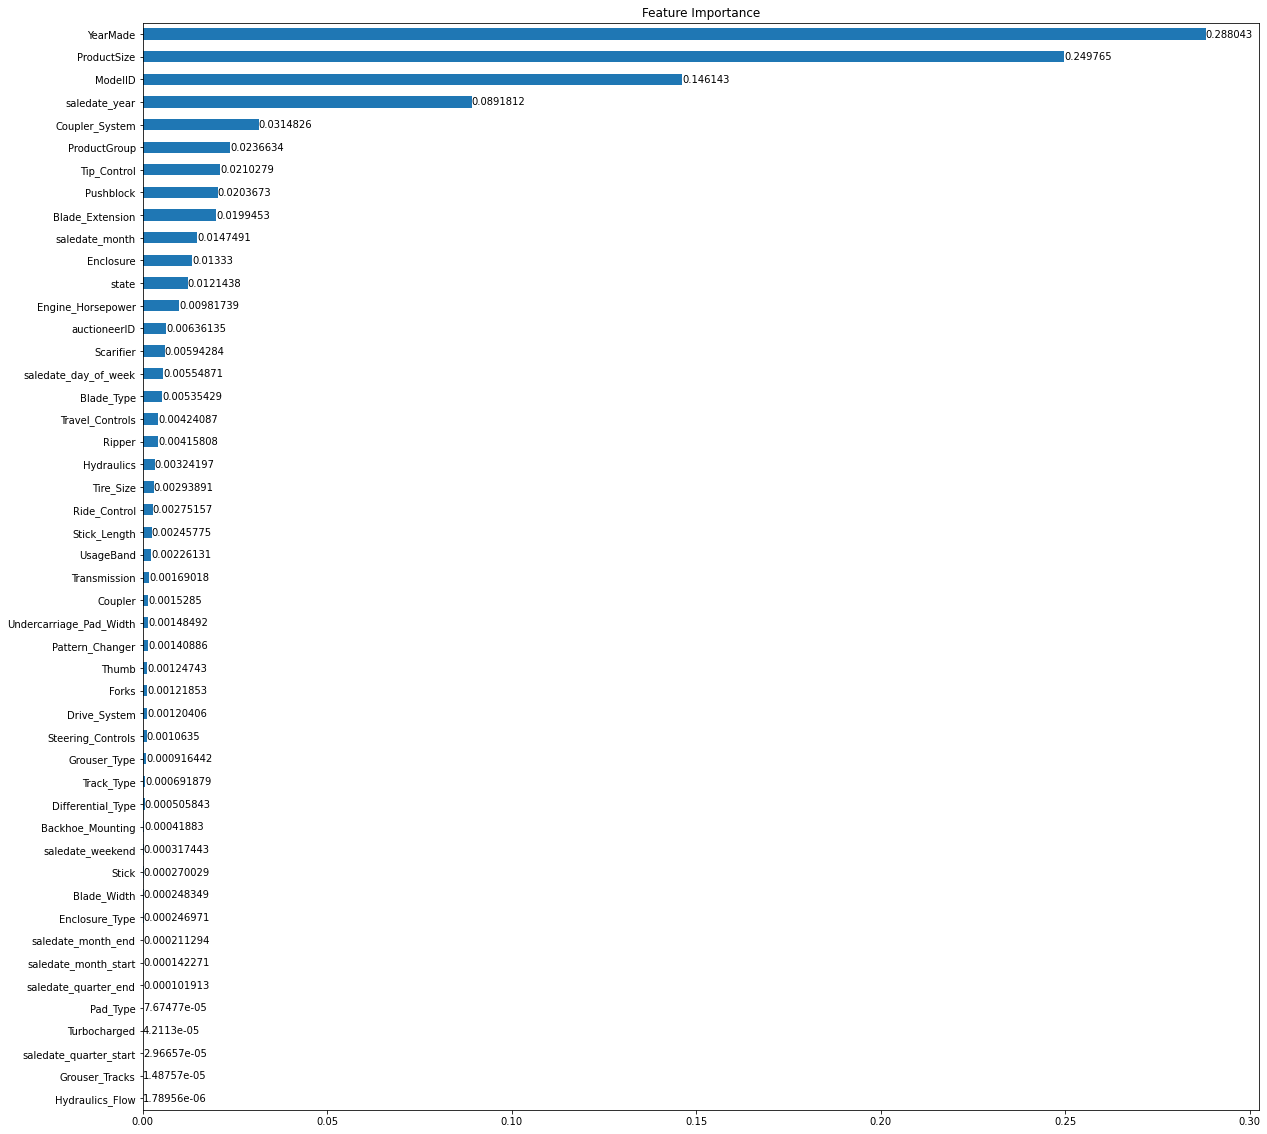

In [ ]:

ax = feat_importance.plot(kind='barh',figsize=(20,20), legend=False, title="Feature Importance");
ax.bar_label(ax.containers[0]);
plt.show()

### View cumulative feature importance.

 We can see that the top 5 features in importance account for roughly 80% of the imporance

In [ ]:
feat_importance.cumsum(axis=0).sort_values(['feature importance'], ascending=False)

,feature importance
YearMade,1.000000
ProductSize,0.711957
ModelID,0.462192
saledate_year,0.316048
Coupler_System,0.226867
ProductGroup,0.195384
Tip_Control,0.171721
Pushblock,0.150693
Blade_Extension,0.130326
saledate_month,0.110380


# Summary


Based upon 6 models, the best model was found to be a Random Forest model using Ordinal Encoding on all features without any feature extraction to crate new features, such as machine age.  

<br> <br>
The model received a RMSLE of 0.266221, which can be compared to the best competition score of 0.22909.  This is not a direct comparison since the competition was scored on a test data set, which as explained previously we were unable to use since the true target values have not been made publically available.

<br> <br>

Further improvement in the model performance may be possible by expanding the number of iterations performed during the randomized grid search. As not all possible parameter combinations were evaluated, we may not have found the best set of parameters.

# Model Visualization and Application

[explainerdashboard](https://explainerdashboard.readthedocs.io/en/latest/) was used to produce an interactive dashboard for use in reviewing the details of the best model. This dashboard can be found [here](http://apps.thomaschampion.net)

<br><br>
A basic webapplication was also developed to allow a user to input values for the 41 datapoints used in the model and make a prediciton on the sale price of a piece of machinery. This model can be found [here](http://apps.thomaschampion.net:5000)